## Importer librairies

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn import preprocessing
from sklearn import decomposition

In [2]:
#Gestion des options d'affichage 
pd.set_option('display.max_row',1000)
pd.set_option('display.max_columns',50)

## Charger les données

In [3]:
df_acp = pd.read_csv('acp.csv')

In [4]:
volailles = pd.read_csv('vollailles.csv')

In [5]:
df_acp.head()

,Dim1,Dim2
0,-1.483437,0.268937
1,2.170711,-0.651809
2,0.130678,0.960287
3,-0.903213,-0.796826
4,5.154111,0.810301


In [6]:
volailles.head()

,Pays,Importations,Production,TDI,Evolution_pop,PIB_2017
0,Afghanistan,29.0,28.0,38.284057,8.77,2058.4
1,Afrique du Sud,514.0,1667.0,24.268178,4.52,13860.3
2,Albanie,38.0,13.0,74.509804,-0.42,12771.0
3,Algérie,2.0,275.0,0.722022,6.33,11737.4
4,Allemagne,842.0,1514.0,49.239766,1.48,53071.5


In [7]:
volailles= volailles.set_index('Pays')

## Classification


### Classification Ascendante Hiérarchique (CAH)

In [8]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hac.fit(df_acp) # X data numpy

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

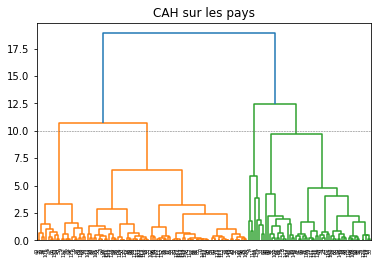

In [10]:
plt.title("CAH sur les pays")
# plot the top three levels of the dendrogram
plot_dendrogram(hac)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()



Je vais sortir quatre clusters

In [11]:
hac4 = AgglomerativeClustering(distance_threshold=None, n_clusters=4)
hac4.fit(df_acp) # X data numpy

AgglomerativeClustering(n_clusters=4)

In [12]:
clusters_hac4 = hac4.labels_

In [13]:
len(hac4.labels_)

154

In [14]:
df_hac4 = volailles[['Importations', 'Production', 'TDI', 'Evolution_pop', 'PIB_2017']]

In [15]:
df_hac4["cluster"] = clusters_hac4
df_hac4.head()

,Importations,Production,TDI,Evolution_pop,PIB_2017,cluster
Pays,,,,,,
Afghanistan,29.0,28.0,38.284057,8.77,2058.4,1
Afrique du Sud,514.0,1667.0,24.268178,4.52,13860.3,0
Albanie,38.0,13.0,74.509804,-0.42,12771.0,3
Algérie,2.0,275.0,0.722022,6.33,11737.4,1
Allemagne,842.0,1514.0,49.239766,1.48,53071.5,2


#### Boxplot HAC

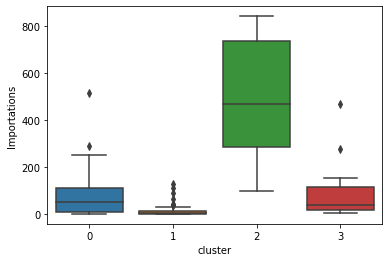

In [16]:
sns.boxplot(df_hac4.cluster,df_hac4["Importations"])
plt.show()

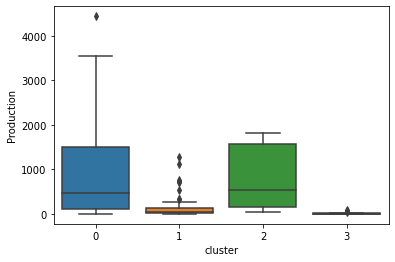

In [17]:
sns.boxplot(df_hac4.cluster,df_hac4["Production"])
plt.show()

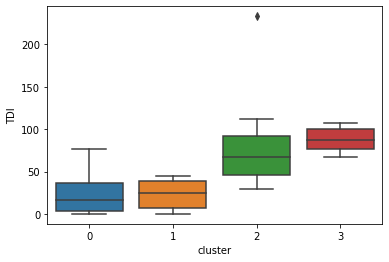

In [18]:
sns.boxplot(df_hac4.cluster,df_hac4["TDI"])
plt.show()

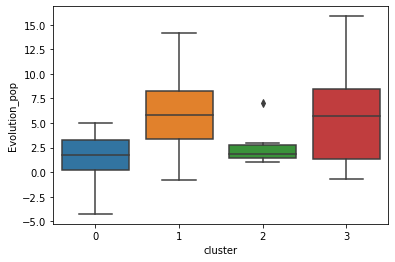

In [19]:
sns.boxplot(df_hac4.cluster,df_hac4["Evolution_pop"])
plt.show()

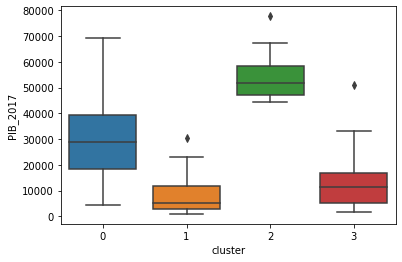

In [20]:
sns.boxplot(df_hac4.cluster,df_hac4["PIB_2017"])
plt.show()

#### Résultats HAC

In [21]:
df_hac4[df_hac4["cluster"] == 2]

,Importations,Production,TDI,Evolution_pop,PIB_2017,cluster
Pays,,,,,,
Allemagne,842.0,1514.0,49.239766,1.48,53071.5,2
Arabie saoudite,722.0,616.0,54.367470,7.07,47306.2,2
Belgique,338.0,463.0,233.103448,1.77,50442.3,2
Danemark,133.0,173.0,79.640719,1.20,55356.7,2
France,506.0,1750.0,28.831909,1.01,44577.1,2
Irlande,99.0,110.0,85.344828,2.73,77749.2,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,1814.0,34.870188,1.99,46372.4,2
Émirats arabes unis,433.0,48.0,111.886305,2.96,67183.6,2


En vertical

In [22]:
# Calcule des distances
Z = linkage(df_acp, method="ward")

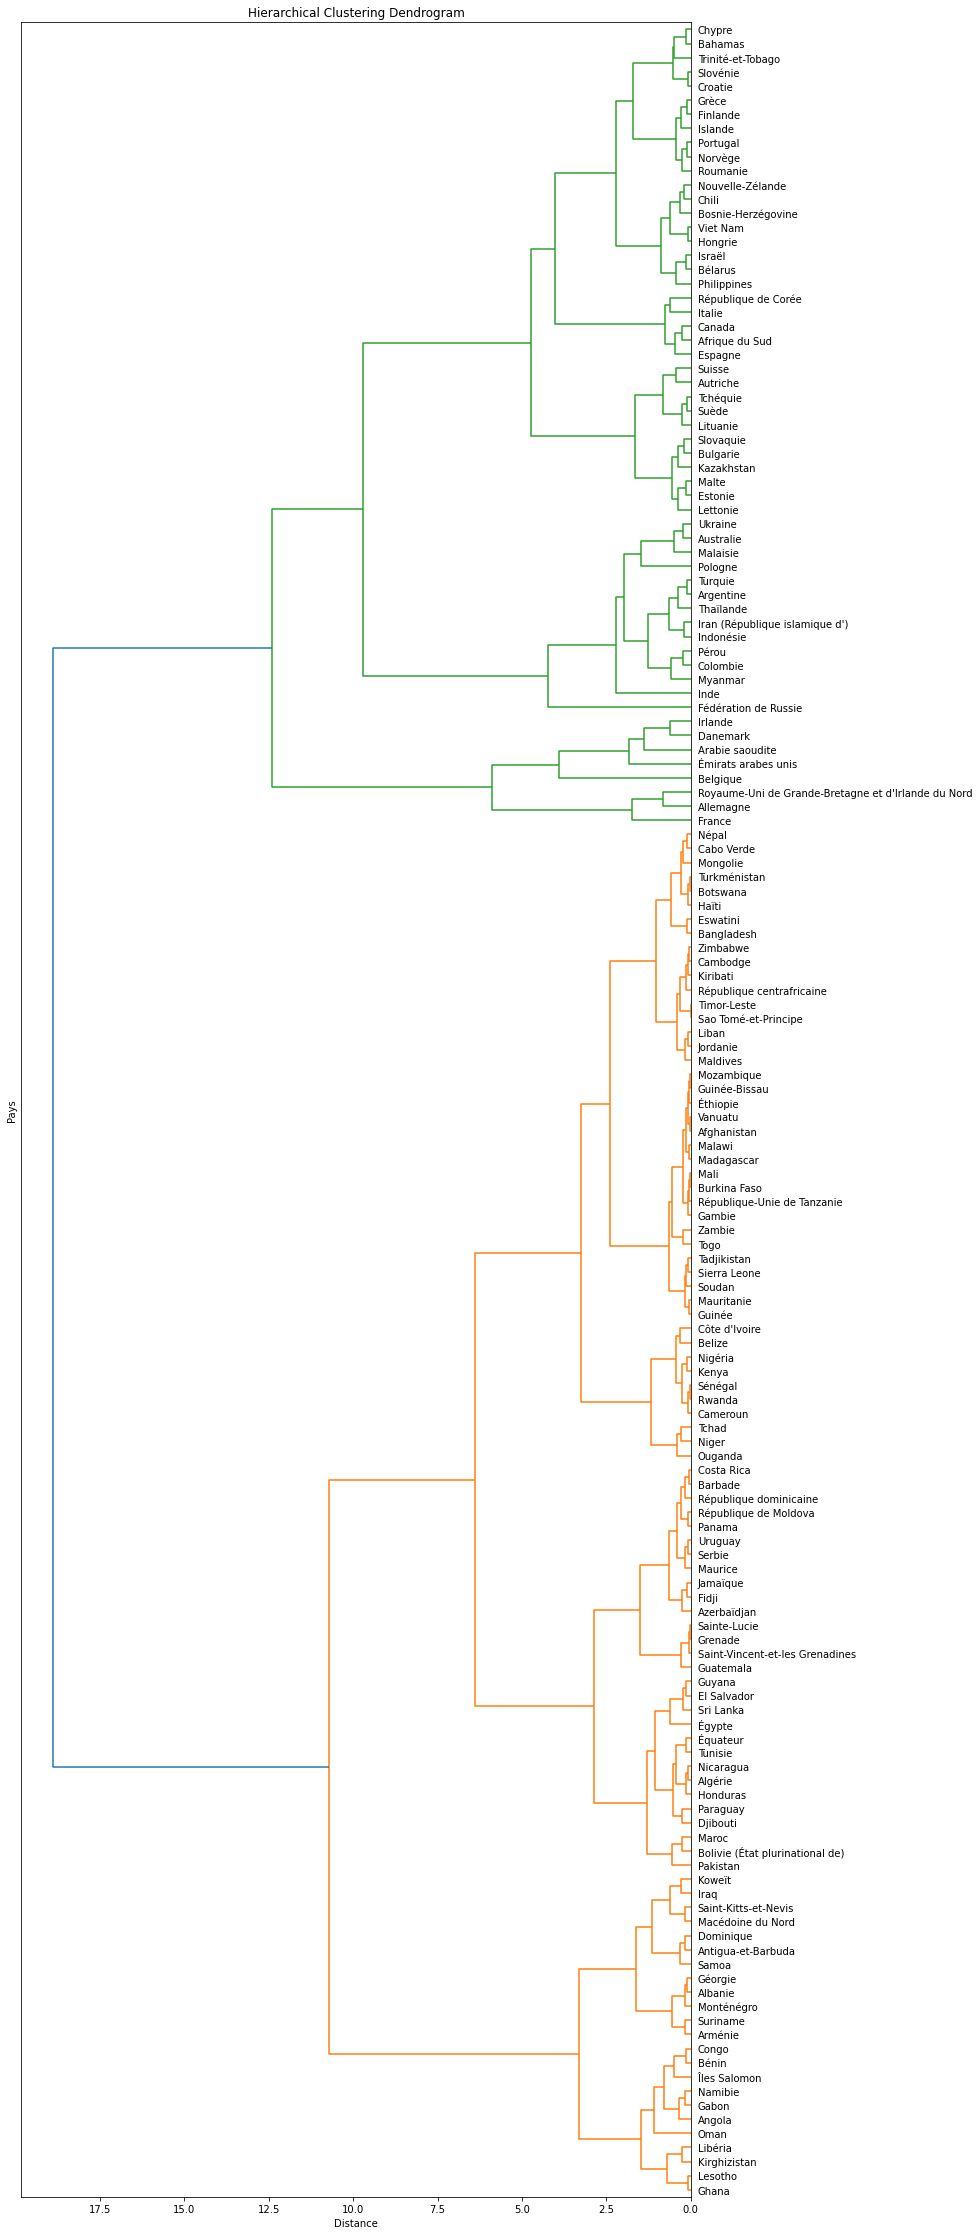

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12,40))

#_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax,
#               leaf_rotation=45, leaf_font_size=8, labels= list(vars_pays.index))
_ = dendrogram(Z, ax=ax, labels=list(volailles.index), orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=10)
ax.tick_params(axis='y', which='major', labelsize=10)

### k-means

 2 classes

In [24]:
kmeans2 = KMeans(n_clusters = 2, random_state= 3)
kmeans2.fit(df_acp)

KMeans(n_clusters=2, random_state=3)

On peut avoir ainsi les classes de chaque individus (qui nous servent ici à calculer la taille de chaque classe), ainsi que les centres des classes.

In [25]:
pd.Series(kmeans2.labels_).value_counts()

0    100
1     54
dtype: int64

In [26]:
kmeans2.cluster_centers_

array([[-0.7696892 ,  0.1851971 ],
       [ 1.42535038, -0.34295758]])

In [27]:
X_k2 = df_acp.assign(classe = kmeans2.labels_)
X_k2.groupby("classe").mean()

,Dim1,Dim2
classe,,
0,-0.769689,0.185197
1,1.425350,-0.342958




En combinant ces informations avec l'ACP, on peut représenter ces 2 classes sur le plan factoriel. On voit bien la séparation horizontale des 2 classes.


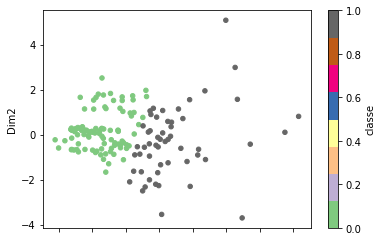

In [28]:
x_pca_k2 = df_acp.assign(classe = kmeans2.labels_)# projected_df (PCA) 
x_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()



3 classes

In [29]:
kmeans3 = KMeans(n_clusters = 3, random_state= 3)
kmeans3.fit(df_acp)

KMeans(n_clusters=3, random_state=3)

In [30]:
pd.Series(kmeans3.labels_).value_counts()

0    78
1    40
2    36
dtype: int64

In [31]:
X_k3 = df_acp.assign(classe = kmeans3.labels_)
X_k3.groupby("classe").mean()

,Dim1,Dim2
classe,,
0,-0.942194,-0.163875
1,0.595586,1.335269
2,1.379658,-1.128569


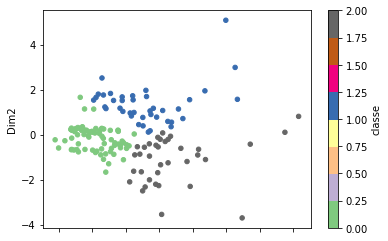

In [32]:
x_pca_k3 = df_acp.assign(classe = kmeans3.labels_)# projected_df (PCA) 
x_pca_k3.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

In [33]:
kmeans4 = KMeans(n_clusters = 4, random_state= True)
kmeans4.fit(df_acp)

pd.Series(kmeans4.labels_).value_counts()

X_k4 = df_acp.assign(classe = kmeans4.labels_)
X_k4.groupby("classe").mean()

,Dim1,Dim2
classe,,
0,0.208524,1.134085
1,-0.964273,-0.195713
2,1.058399,-1.242186
3,3.430842,1.702737


In [34]:
centers4 = kmeans4.cluster_centers_

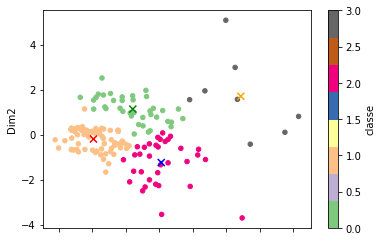

In [35]:
x_pca_k4 = df_acp.assign(classe = kmeans4.labels_)# projected_df (PCA) 
x_pca_k4.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
#plt.scatter(centers4[:,0], centers4[:,1], marker="x", color='navy')
plt.scatter(centers4[:,0] , centers4[:,1] , marker = "x", s=50,linewidths = 5,
            c=['green', 'red','blue','orange'])
plt.show()

#### Choix du nombre de classes avec k-means

L'algorithme k-means nous permet d'avoir à la fin l'inertie intra-classes, qui représente la disparité des individus à l'intérieur des classes. Plus cette valeur est proche de 0, meilleur est la partition. Malheureusement, la meilleure partition selon ce critère est donc celle avec autant de classes que d'individus (ce qui n'est pas très utile...).

On va donc chercher un point d'inflexion dans la courbe d'évolution de ce critère. Voici comment faire pour avoir ce graphique. Et ici, le point le plus marquant est celui à 2 classes. Ensuite, celui à 3 classes peut montrer aussi une certaine cassure dans l'évolution du critère.

In [36]:
def optimase_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range (1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig= plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

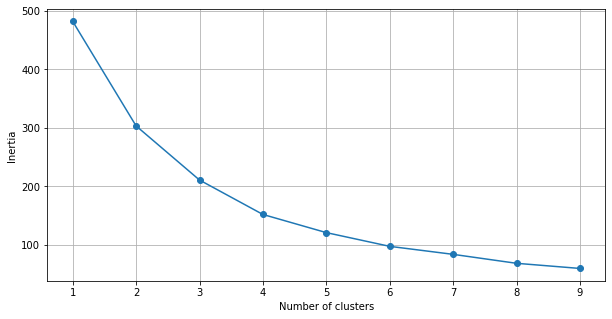

In [37]:
optimase_k_means(df_acp,10)

#### Boxplot Kmeans

In [38]:
clusters= kmeans4.labels_

In [39]:
# Ajouter les clusters au df vars_pays
volailles["clusters"] = clusters

In [40]:
volailles.head()

,Importations,Production,TDI,Evolution_pop,PIB_2017,clusters
Pays,,,,,,
Afghanistan,29.0,28.0,38.284057,8.77,2058.4,1
Afrique du Sud,514.0,1667.0,24.268178,4.52,13860.3,2
Albanie,38.0,13.0,74.509804,-0.42,12771.0,0
Algérie,2.0,275.0,0.722022,6.33,11737.4,1
Allemagne,842.0,1514.0,49.239766,1.48,53071.5,3


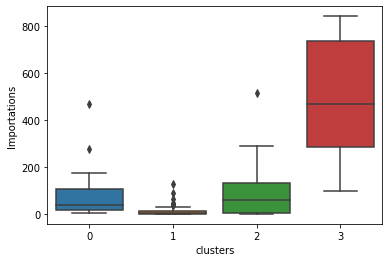

In [41]:
sns.boxplot(volailles.clusters,volailles["Importations"])
plt.show()

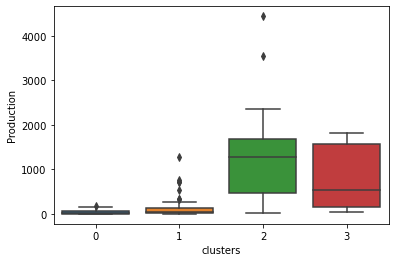

In [42]:
sns.boxplot(volailles.clusters,volailles["Production"])
plt.show()

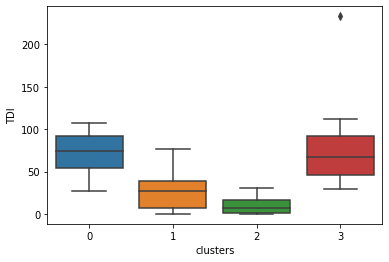

In [43]:
sns.boxplot(volailles.clusters,volailles["TDI"])
plt.show()

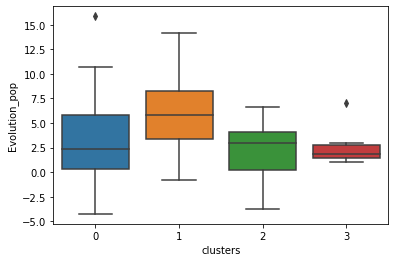

In [44]:
sns.boxplot(volailles.clusters,volailles["Evolution_pop"])
plt.show()

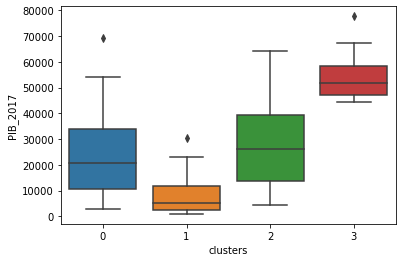

In [45]:
sns.boxplot(volailles.clusters,volailles["PIB_2017"])
plt.show()

#### Résultats Kmeans

In [46]:
volailles[volailles["clusters"] == 3]

,Importations,Production,TDI,Evolution_pop,PIB_2017,clusters
Pays,,,,,,
Allemagne,842.0,1514.0,49.239766,1.48,53071.5,3
Arabie saoudite,722.0,616.0,54.367470,7.07,47306.2,3
Belgique,338.0,463.0,233.103448,1.77,50442.3,3
Danemark,133.0,173.0,79.640719,1.20,55356.7,3
France,506.0,1750.0,28.831909,1.01,44577.1,3
Irlande,99.0,110.0,85.344828,2.73,77749.2,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,779.0,1814.0,34.870188,1.99,46372.4,3
Émirats arabes unis,433.0,48.0,111.886305,2.96,67183.6,3
